**CS596 - Machine Learning**
<br>
Date: **19 October 2020**


Title: **Seminar 5 - Part B**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h2 align="center">Simple Neural Networks Examples</h2>


- One of the most important part of learning ML is learning to read articles.


- As an experiment, let's consider an article: https://victorzhou.com/blog/intro-to-neural-networks/

In [10]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs): 
        total = np.dot(self.weights, inputs) + self.bias # Weight inputs and add bias
        return sigmoid(total)                            # Use the activation function 

w = np.array([0, 1])   # Weights, w1 = 0, w2 = 1
b = 4                  # Bias, b = 4
n = Neuron(weights, bias)

X = np.array([2, 3])   # Input Vector,  x1 = 2, x2 = 3
print(n.feedforward(x))   

0.9990889488055994


In [16]:
import numpy as np

class NeuralNetwork:
    '''
    A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


In [18]:
import numpy as np

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred))

0.5


Epoch 0 loss: 0.308
Epoch 10 loss: 0.224
Epoch 20 loss: 0.156
Epoch 30 loss: 0.107
Epoch 40 loss: 0.075
Epoch 50 loss: 0.056
Epoch 60 loss: 0.044
Epoch 70 loss: 0.036
Epoch 80 loss: 0.030
Epoch 90 loss: 0.026
Epoch 100 loss: 0.022
Epoch 110 loss: 0.020
Epoch 120 loss: 0.018
Epoch 130 loss: 0.016
Epoch 140 loss: 0.015
Epoch 150 loss: 0.013
Epoch 160 loss: 0.012
Epoch 170 loss: 0.011
Epoch 180 loss: 0.011
Epoch 190 loss: 0.010
Epoch 200 loss: 0.009
Epoch 210 loss: 0.009
Epoch 220 loss: 0.008
Epoch 230 loss: 0.008
Epoch 240 loss: 0.007
Epoch 250 loss: 0.007
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.006
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.004
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

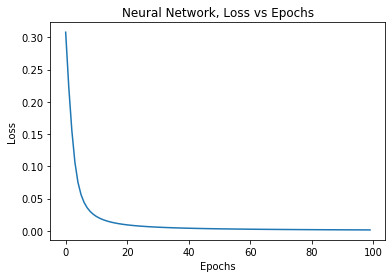

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x) 
    return fx * (1 - fx) # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean() # y_true and y_pred are numpy arrays of the same length.

class OurNeuralNetwork:
    '''
    A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    '''
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
        Elements in all_y_trues correspond to those in data.
        '''
    
        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset
        
        losses = []
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
            
            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                losses.append(loss)
                print("Epoch %d loss: %.3f" % (epoch, loss))
        
        plt.plot(losses)
        plt.title('Neural Network, Loss vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()     
        

# Define dataset
data = np.array([
  [-2,  -1],  # Alice
  [25,   6],  # Bob
  [17,   4],  # Charlie
  [-15, -6],  # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network
network = OurNeuralNetwork()
network.train(data, all_y_trues)

**What Is a Batch?**

- The **batch** size is a **hyperparameter** that defines the **number of samples** to work through **before updating the internal model parameters**.


- A training dataset can be divided into one or more batches:
  - **Batch Gradient Descent**: Batch Size = Size of Training Set
  - **Stochastic Gradient Descent**: Batch Size = 1
  - **Mini-Batch Gradient Descent**: 1 < Batch Size < Size of Training Set
  
  
**What Is an Epoch?**
  - The number of **epochs** is a **hyperparameter** that defines the **number times** that the **learning algorithm will work through the entire training dataset**.

In [28]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.950
Frank: 0.040


<h1 align="center">End of Part B</h1>